# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


Setting batch size for training data and number of CNNs

In [2]:
batch_size = 86
num_nets = 15

# Imoport data
Data input train and test data

In [3]:
digits_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
digits_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

# Data exploration
Columns

In [4]:
print(digits_train.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


We can see that data have label and other pixels columns. Which label present the digit and pixel present pixel of image

We create Features (X) variable and Labels (Y) variable, reshaped X and normalize X to be in a range [0,1] (the same with our data to submit (X_test))   

In [5]:
X = digits_train.drop(columns="label").values.reshape(digits_train.shape[0],28,28,1) / 255.0
Y = to_categorical(digits_train["label"], num_classes=10)
X_test = digits_test.values.reshape(digits_test.shape[0],28,28,1) / 255.0

Show Image This is how 784 pixels of each row form to be images

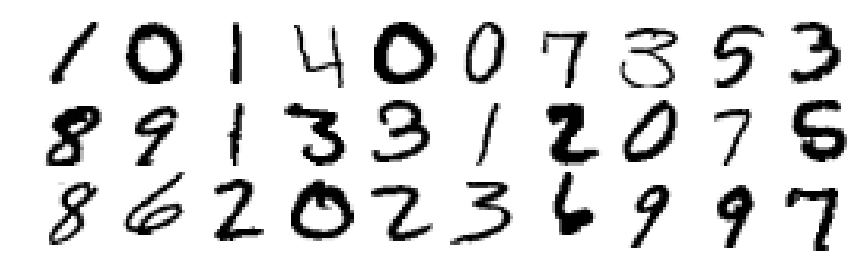

In [6]:
plt.figure(figsize=(15, 4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(X[i].reshape((28,28)), cmap=plt.cm.binary)
    plt.axis("off")
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

# Generate more images
By randomly rotating, scaling, and shifting 

In [7]:
datagen_train = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

Plot some generated images

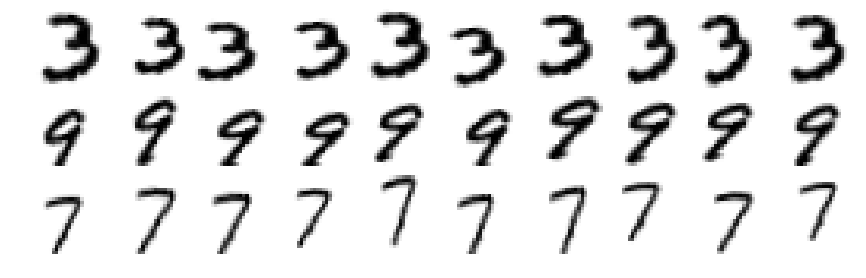

In [8]:
X_ = X[9,].reshape((1,28,28,1))
Y_ = Y[9,].reshape((1,10))


plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    X_generated, Y_generated = datagen_train.flow(X_,Y_).next()
    plt.imshow(X_generated[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: X_ = X[11,].reshape((1,28,28,1))
    if i==19: X_ = X[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

# Build CNNs Model

In [9]:
model = [0] * num_nets
for j in range(num_nets):
    model[j] = Sequential()
    
    model[j].add(Conv2D(32, kernel_size = 3, activation = "relu", input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation = "relu"))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides = 2, padding = "same", activation = "relu"))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))
    
    model[j].add(Conv2D(64, kernel_size = 3, activation = "relu"))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation = "relu"))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides = 2, padding = "same", activation = "relu"))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))
    
    model[j].add(Conv2D(128, kernel_size = 4, activation = "relu"))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation = "softmax"))
    
    
    model[j].compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Train CNNs

In [10]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
history = [0] * num_nets
epochs = 45
for j in range(num_nets):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.1)
    history[j] = model[j].fit_generator(datagen_train.flow(x_train, y_train, batch_size = 64),
                                       epochs = epochs, 
                                       steps_per_epoch = x_train.shape[0] // 64,
                                       validation_data = (x_val, y_val), 
                                       callbacks = [annealer],
                                       verbose = 0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 1: Epochs=45, Train accuracy=0.99613, Validation accuracy=0.99714
CNN 2: Epochs=45, Train accuracy=0.99621, Validation accuracy=0.99619
CNN 3: Epochs=45, Train accuracy=0.99626, Validation accuracy=0.99667
CNN 4: Epochs=45, Train accuracy=0.99623, Validation accuracy=0.99714
CNN 5: Epochs=45, Train accuracy=0.99618, Validation accuracy=0.99524
CNN 6: Epochs=45, Train accuracy=0.99603, Validation accuracy=0.99667
CNN 7: Epochs=45, Train accuracy=0.99605, Validation accuracy=0.99643
CNN 8: Epochs=45, Train accuracy=0.99600, Validation accuracy=0.99619
CNN 9: Epochs=45, Train accuracy=0.99629, Validation accuracy=0.99595
CNN 10: Epochs=45, Train accuracy=0.99650, Validation accuracy=0.99548
CNN 11: Epochs=45, Train accuracy=0.99623, Validation accuracy=0.99667
CNN 12: Epochs=45, Train accuracy=0.99624, Validation accuracy=0.99619
CNN 13: Epochs=45, Train accuracy=0.99626, Validation accuracy=0.99548
CNN 14: Epochs=45, Train accuracy=0.99642, Validation accuracy=0.99714
CNN 15: Epochs=

# Ensemble CNNs predictions and submit

In [11]:
# PREDICTIONS AND SUBMIT
results = np.zeros((X_test.shape[0], 10))
for j in range(num_nets):
    results = results + model[j].predict(X_test)
results = np.argmax(results, axis = 1)
results = pd.Series(results, name = "Label")
submission = pd.concat([pd.Series(range(1, 28001), name = "ImageId"), results], axis = 1)
submission.ImageId = submission.ImageId.astype(int)
submission.to_csv("prediction.csv", index = False)

Preview predictions

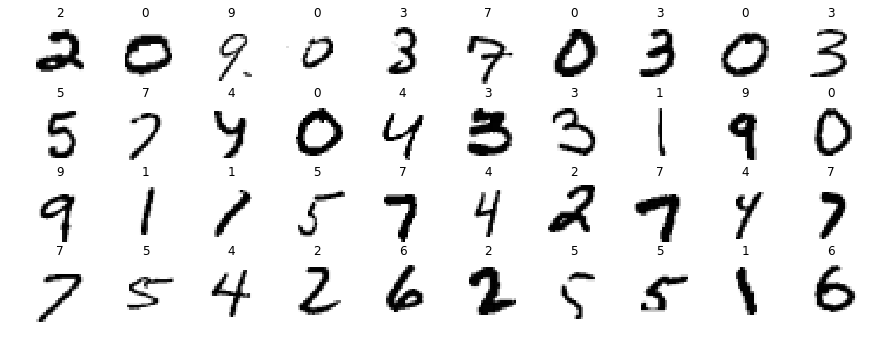

In [12]:
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title(results[i],y=0.95)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()